In [39]:
import torch
import matplotlib.pyplot as plt
from torch import optim, distributions, nn
from tqdm.autonotebook import tqdm
from gpzoo.gp_stuff import NSF, NSF_RBF
import squidpy as sq
import numpy as np
import pandas as pd

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [16]:
adata = sq.datasets.slideseqv2()
Y_sums = np.array(np.sum(adata.raw.X > 0, axis=0))[0]
Y = np.array(adata.raw.X[:, Y_sums>1000].todense() * 1000, dtype=int).T

In [68]:
X = adata.obsm['spatial']

In [71]:
len(adata.obs.cluster.values.categories)

14

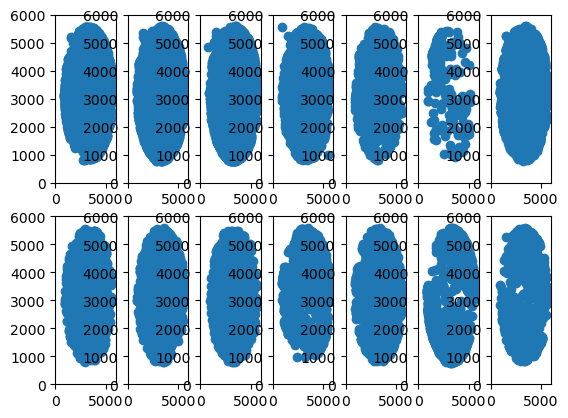

In [73]:
for i, category in enumerate(adata.obs.cluster.values.categories):
    mask = adata.obs.cluster.values==category
    plt.subplot(2, 7, i+1)
    plt.scatter(adata.obs.x[mask], adata.obs.y[mask])
    plt.xlim([0, 6000])
    plt.ylim([0, 6000])
    plt.

In [25]:
adata.obs

,barcode,x,y,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,n_counts,leiden,cluster
AACGTCATAATCGT,AACGTCATAATCGT,888.95,3219.5,6539,8.785692,23772.0,10.076305,16.902238,22.311964,29.559987,42.756184,958.0,6.865891,4.029951,23772.0,0,DentatePyramids
TACTTTAGCGCAGT,TACTTTAGCGCAGT,4762.20,5020.4,6017,8.702510,19661.0,9.886443,19.744672,24.698642,31.488734,44.428056,1579.0,7.365180,8.031128,19661.0,6,CA1_CA2_CA3_Subiculum
CATGCCTGGGTTCG,CATGCCTGGGTTCG,886.50,3199.6,5319,8.579229,15999.0,9.680344,16.463529,22.182636,29.776861,43.990249,707.0,6.562444,4.419026,15999.0,0,DentatePyramids
TCGATATGGCACAA,TCGATATGGCACAA,2237.10,5144.6,5554,8.622454,15069.0,9.620461,13.783264,19.092176,26.212755,40.467184,544.0,6.300786,3.610060,15069.0,6,DentatePyramids
TTATCTGACGAAGC,TTATCTGACGAAGC,1031.80,2425.2,4946,8.506537,14013.0,9.547812,16.984229,22.664669,30.207664,44.287447,681.0,6.525030,4.859773,14013.0,0,Subiculum_Entorhinal_cl2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CACCCGATGACTCC,CACCCGATGACTCC,4314.40,1770.1,100,4.615121,120.0,4.795791,58.333333,100.000000,100.000000,100.000000,6.0,1.945910,5.000000,120.0,3,Polydendrocytes
CTTGATTAGGCAGG,CTTGATTAGGCAGG,1452.50,3013.1,108,4.691348,127.0,4.852030,54.330709,93.700787,100.000000,100.000000,20.0,3.044523,15.748032,127.0,1,Interneurons
GAGTTCCTAAGCGG,GAGTTCCTAAGCGG,3090.10,2045.0,103,4.644391,114.0,4.744932,53.508772,97.368421,100.000000,100.000000,6.0,1.945910,5.263158,114.0,1,DentatePyramids
GCGCTCAGTGCTCT,GCGCTCAGTGCTCT,3304.10,3491.5,112,4.727388,115.0,4.753590,46.086957,89.565217,100.000000,100.000000,4.0,1.609438,3.478261,115.0,7,Interneurons
